# Setting up the project
First we will have to download our data from Life Expectancy and GDP project and make sure our directory is set up for Jupyter notebook.

# Setting up your Git repository
Create a new Git repository for this project.

# Load the data

In [3]:
# Load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt

In [16]:

## Load Data
all_data = pd.read_csv("all_data.csv")
print(all_data.head())

# Rename 'Life expectancy at birth (years)' column
all_data.rename(columns={'Life expectancy at birth (years)': 'Life_Expectancy'}, inplace=True)

# Check column names
all_data.columns

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


Index(['Country', 'Year', 'Life_Expectancy', 'GDP'], dtype='object')

# Explore and Explain Data
Once you have your data, it’s a good idea to get acquainted with it. You should show some summary statistics and visually examine your data. Don’t forget to write out some insights that you have gained along with your analysis.

In [17]:
#Summary Statistics
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life_Expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


### Let's explore the Life Expectancy column

In [18]:
all_data.Country.unique() # Chile, China, Germany, Mexico, United States of America and Zimbabwe

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [29]:
# Median and Mean Life Expectancies (global and by country)
print("The life expectancy median of all the countries is {} year(s)".format(all_data.Life_Expectancy.median()))
print("The life expectancy mean of all the countries is {} year(s)".format(all_data.Life_Expectancy.mean()))
print("The life expectancy standard deviation of all the countries is {} year(s)".format(all_data.Life_Expectancy.std()))

The life expectancy median of all the countries is 76.75 year(s)
The life expectancy mean of all the countries is 72.78958333333335 year(s)
The life expectancy standard deviation of all the countries is 10.6728823036079 year(s)


In [33]:
# Mean Life Expectancy by Country
life_mean_by_country = all_data.groupby("Country").Life_Expectancy.mean()
print("Mean Life Expectancy by country")
print(life_mean_by_country)

Mean Life Expectancy by country
Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: Life_Expectancy, dtype: float64


In [25]:
# Max Life Expectancy by Country
life_max_by_country = all_data.groupby("Country").Life_Expectancy.max()
print("Max Life Expectancy by country")
print(life_max_by_country) #The Max are from Germany

Max Life Expectancy by country
Country
Chile                       80.5
China                       76.1
Germany                     81.0
Mexico                      76.7
United States of America    79.3
Zimbabwe                    60.7
Name: Life_Expectancy, dtype: float64


In [26]:
# Min Life Expectancy by Country
life_min_by_country = all_data.groupby("Country").Life_Expectancy.min()
print("Min Life Expectancy by country")
print(life_min_by_country)

Min Life Expectancy by country
Country
Chile                       77.3
China                       71.7
Germany                     78.0
Mexico                      74.8
United States of America    76.8
Zimbabwe                    44.3
Name: Life_Expectancy, dtype: float64


### Now we explore the GDP

In [32]:
# GDP statistics
print("The GDP's median of all the countries is ${}".format(all_data.GDP.median()))
print("The GDP's mean of all the countries is ${}".format(all_data.GDP.mean()))
print("The GDP's standard deviation of all the countries is ${}".format(all_data.GDP.std()))

The GDP's median of all the countries is $1280220000000.0
The GDP's mean of all the countries is $3880498570768.396
The GDP's standard deviation of all the countries is $5197561310975.917


In [34]:
# Mean GDP by Country
gdp_mean_by_country = all_data.groupby("Country").GDP.mean()
print("Mean GDP by country")
print(gdp_mean_by_country)

Mean GDP by country
Country
Chile                       1.697888e+11
China                       4.957714e+12
Germany                     3.094776e+12
Mexico                      9.766506e+11
United States of America    1.407500e+13
Zimbabwe                    9.062580e+09
Name: GDP, dtype: float64


In [35]:
# Max GDP by Country
gdp_max_by_country = all_data.groupby("Country").GDP.max()
print("Max GDP by country")
print(gdp_max_by_country)

Max GDP by country
Country
Chile                       2.783840e+11
China                       1.106470e+13
Germany                     3.890610e+12
Mexico                      1.298460e+12
United States of America    1.810000e+13
Zimbabwe                    1.630467e+10
Name: GDP, dtype: float64


In [36]:
# Min GDP by Country
gdp_min_by_country = all_data.groupby("Country").GDP.min()
print("Min GDP by country")
print(gdp_min_by_country)

Min GDP by country
Country
Chile                       6.973681e+10
China                       1.211350e+12
Germany                     1.949950e+12
Mexico                      6.836480e+11
United States of America    1.030000e+13
Zimbabwe                    4.415703e+09
Name: GDP, dtype: float64


### Now we plot some relationships

In [37]:
all_data.head()

,Country,Year,Life_Expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


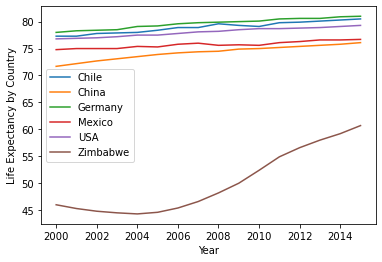

In [45]:
# Evolution of the Life Expectancy
chile_data = all_data[all_data.Country == "Chile"]
china_data = all_data[all_data.Country == "China"]
germany_data = all_data[all_data.Country == "Germany"]
mexico_data = all_data[all_data.Country == "Mexico"]
usa_data = all_data[all_data.Country == "United States of America"]
zimbabwe_data = all_data[all_data.Country == "Zimbabwe"]

plt.plot(chile_data.Year, chile_data.Life_Expectancy)
plt.plot(china_data.Year, china_data.Life_Expectancy)
plt.plot(germany_data.Year, germany_data.Life_Expectancy)
plt.plot(mexico_data.Year, mexico_data.Life_Expectancy)
plt.plot(usa_data.Year, usa_data.Life_Expectancy)
plt.plot(zimbabwe_data.Year, zimbabwe_data.Life_Expectancy)
plt.xlabel("Year")
plt.ylabel("Life Expectancy by Country")
plt.legend(["Chile", "China", "Germany", "Mexico", "USA", "Zimbabwe"])
plt.show()

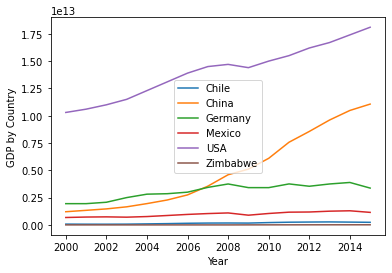

In [49]:
# Evolution of the GDP
plt.plot(chile_data.Year, chile_data.GDP)
plt.plot(china_data.Year, china_data.GDP)
plt.plot(germany_data.Year, germany_data.GDP)
plt.plot(mexico_data.Year, mexico_data.GDP)
plt.plot(usa_data.Year, usa_data.GDP)
plt.plot(zimbabwe_data.Year, zimbabwe_data.GDP)
plt.xlabel("Year")
plt.ylabel("GDP by Country")
plt.legend(["Chile", "China", "Germany", "Mexico", "USA", "Zimbabwe"], loc=0)
plt.show()

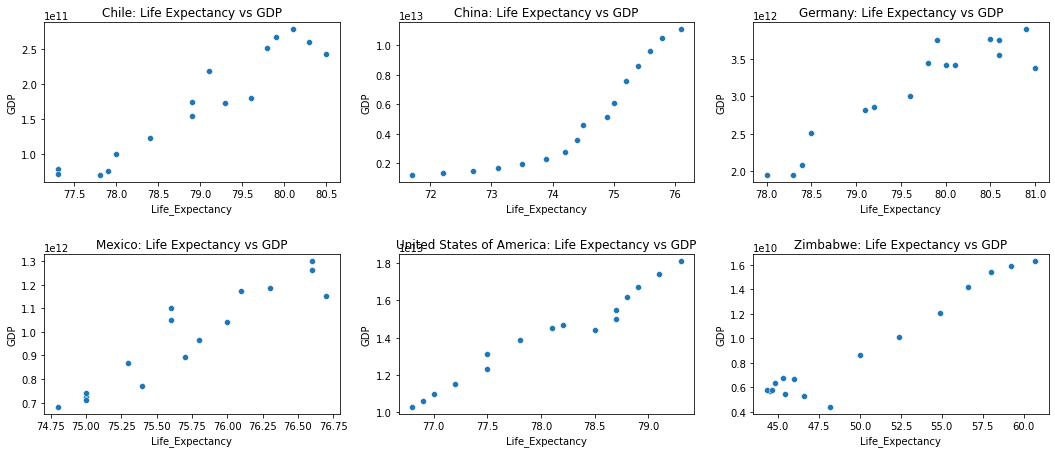

<Figure size 432x288 with 0 Axes>

In [68]:
# Relationship between Life Expectancy and GDP by country
plt.figure(figsize=(18, 8))

# Chile subplot
plt.subplot(2, 3, 1)
sns.scatterplot(x='Life_Expectancy',y='GDP', data=chile_data)
plt.title("Chile: Life Expectancy vs GDP")
# China subplot
plt.subplot(2, 3, 2)
sns.scatterplot(x='Life_Expectancy',y='GDP', data=china_data)
plt.title("China: Life Expectancy vs GDP")
# Germany subplot
plt.subplot(2, 3, 3)
sns.scatterplot(x='Life_Expectancy',y='GDP', data=germany_data)
plt.title("Germany: Life Expectancy vs GDP")
# Mexico subplot
plt.subplot(2, 3, 4)
sns.scatterplot(x='Life_Expectancy',y='GDP', data=mexico_data)
plt.title("Mexico: Life Expectancy vs GDP")
# USA subplot
plt.subplot(2, 3, 5)
sns.scatterplot(x='Life_Expectancy',y='GDP', data=usa_data)
plt.title("United States of America: Life Expectancy vs GDP")
# Zimbabwe subplot
plt.subplot(2, 3, 6)
sns.scatterplot(x='Life_Expectancy',y='GDP', data=zimbabwe_data)
plt.title("Zimbabwe: Life Expectancy vs GDP")

plt.subplots_adjust(hspace = 0.45, bottom = 0.2)
plt.show()
plt.savefig('life_expectancy_and_gdp_by_country.png')

We can clearly see a strong positive relationship between the GDP and life expectancy for every country.

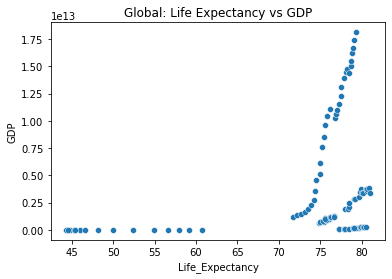

In [66]:
sns.scatterplot(x='Life_Expectancy',y='GDP', data=all_data)
plt.title("Global: Life Expectancy vs GDP")
plt.show()

But when we take a global view (all countries), the relationship between life expectancy and GDP is less visible or significant.

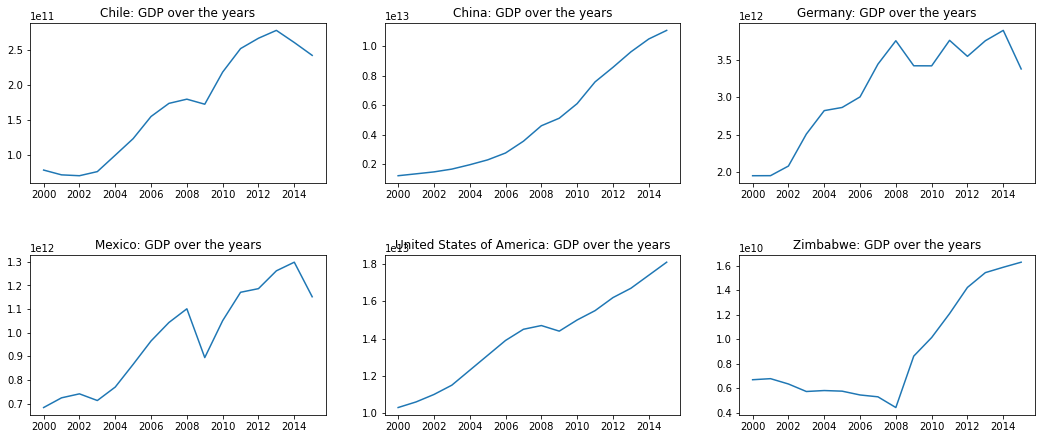

<Figure size 432x288 with 0 Axes>

In [70]:
# Relationship between GDP and Year by country
plt.figure(figsize=(18, 8))

# Chile subplot
plt.subplot(2, 3, 1)
plt.plot(chile_data.Year, chile_data.GDP)
plt.title("Chile: GDP over the years")
# China subplot
plt.subplot(2, 3, 2)
plt.plot(china_data.Year, china_data.GDP)
plt.title("China: GDP over the years")
# Germany subplot
plt.subplot(2, 3, 3)
plt.plot(germany_data.Year, germany_data.GDP)
plt.title("Germany: GDP over the years")
# Mexico subplot
plt.subplot(2, 3, 4)
plt.plot(mexico_data.Year, mexico_data.GDP)
plt.title("Mexico: GDP over the years")
# USA subplot
plt.subplot(2, 3, 5)
plt.plot(usa_data.Year, usa_data.GDP)
plt.title("United States of America: GDP over the years")
# Zimbabwe subplot
plt.subplot(2, 3, 6)
plt.plot(zimbabwe_data.Year, zimbabwe_data.GDP)
plt.title("Zimbabwe: GDP over the years")

plt.subplots_adjust(hspace = 0.45, bottom = 0.2)
plt.show()
plt.savefig('gdp_evolution_by_country.png')

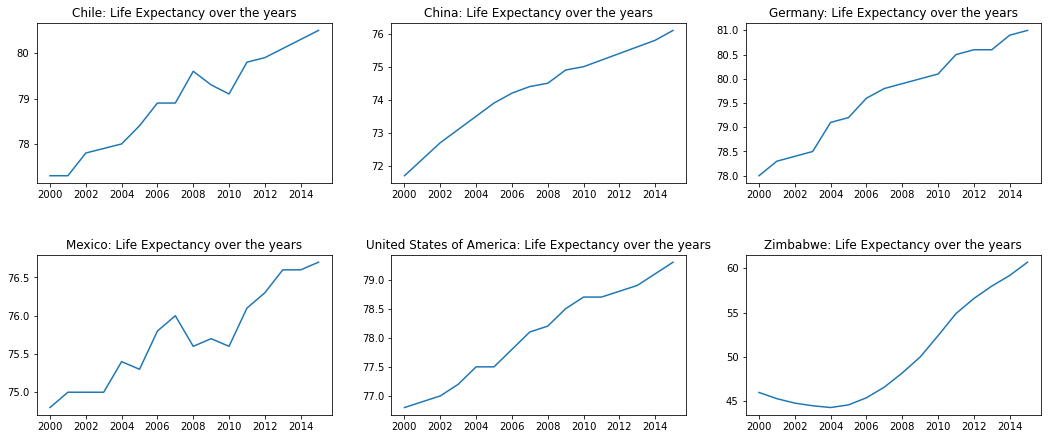

<Figure size 432x288 with 0 Axes>

In [71]:
# Relationship between Life Expectancy and Year by country
plt.figure(figsize=(18, 8))

# Chile subplot
plt.subplot(2, 3, 1)
plt.plot(chile_data.Year, chile_data.Life_Expectancy)
plt.title("Chile: Life Expectancy over the years")
# China subplot
plt.subplot(2, 3, 2)
plt.plot(china_data.Year, china_data.Life_Expectancy)
plt.title("China: Life Expectancy over the years")
# Germany subplot
plt.subplot(2, 3, 3)
plt.plot(germany_data.Year, germany_data.Life_Expectancy)
plt.title("Germany: Life Expectancy over the years")
# Mexico subplot
plt.subplot(2, 3, 4)
plt.plot(mexico_data.Year, mexico_data.Life_Expectancy)
plt.title("Mexico: Life Expectancy over the years")
# USA subplot
plt.subplot(2, 3, 5)
plt.plot(usa_data.Year, usa_data.Life_Expectancy)
plt.title("United States of America: Life Expectancy over the years")
# Zimbabwe subplot
plt.subplot(2, 3, 6)
plt.plot(zimbabwe_data.Year, zimbabwe_data.Life_Expectancy)
plt.title("Zimbabwe: Life Expectancy over the years")

plt.subplots_adjust(hspace = 0.45, bottom = 0.2)
plt.show()
plt.savefig('life_expectancy_evolution_by_country.png')

# Conclusion

When we plot the data globally, it is difficult to see the relationship between GDP and life expectancy. 
And it is more significant when we deep down with statistics by country.
Finally, there are our observations:
- Germany has the greater mean of life expectancy and GDP
- The max life expectancy is in Germany and the max GDP in United States of America
- Globally, five of the countries have approximately the same values for GDP and life expectancy.
- On the other hand, Zimbabwe has by far the lowest GDP and life expectancy. 30 to 50% down

Over the time, we have a real growth of the life expectancy for every country. It almost the same for GDP, except in Germany where the GDP seems to not change between 2008 and 2014.

Our main goal was to identify a relationship between life expectancy and GDP. Visually, we can describe a strong positive relationship! The GDP goes up when life expectancy increases

# Create a blog post
Create a blog post using Medium, or some other blogging platform.

Your blog post should include the following:

- A compelling title about your findings
- An introduction to the data research
- A section sharing the background info (definition of GDP for example) and sources for your data as well as any further research you conducted
- An accompanying paragraph describing the following visualizations
- A conclusion touching on the limitations of the data and further research

Visualizations that can be included:

- The violin plot of the life expectancy distribution by country
- The facet grid of scatter graphs mapping GDP as a function of Life Expectancy by country
- The facet grid of line graphs mapping GDP by country
- The facet grid of line graphs mapping Life Expectancy by country

More Resources:

The Guardian’s Datablog is a good resource for example blog posts about data visualizations.